<a href="https://colab.research.google.com/github/Aytsan11/ML/blob/main/CatBoost_%D0%9B%D0%A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ЛР CATBOOST

* найти набор данных, для которого МОЖНО РЕШИТЬ ЗАДАЧУ КЛАССИФИКАЦИИ ИЛИ РЕГРЕССИИ
* выполнить предобработку (если необходимо) и стандартизацию данных (любым способом)
* разделить набор данных на обучающую и тестовую выборки
* построить модель catboost
* выбрать метрику для оценки качества моделей
* оценить качество модели с помощью выбранной метрики на тестовой выборке
* построить вторую модель (отличную от первой), оценить её качество, выбрать лучшую модель
* для лучшей модели построить график важности признаков и сделать выводы о важности признаков

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [ ]:
df = pd.read_csv('/content/House_Price.csv')

In [ ]:
df

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,NaN,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,NaN,47,YES,0.060694


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    351 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

1. **price** – стоимость дома.  
2. **crime_rate** – уровень преступности в районе.  
3. **resid_area** – доля жилых районов в данной местности.  
4. **air_qual** – показатель качества воздуха.  
5. **room_num** – среднее количество комнат в доме.  
6. **age** – средний возраст домов в районе.  
7. **dist1, dist2, dist3, dist4** – расстояние до 4 основных деловых центров (может измеряться в километрах).  
8. **teachers** – количество учителей на 1000 учеников в районе.  
9. **poor_prop** – доля населения с низким уровнем дохода.  
10. **airport** – наличие аэропорта поблизости (категориальный признак: «Yes» или «No»).  
11. **n_hos_beds** – количество больничных коек в ближайших медицинских учреждениях.  
12. **n_hot_rooms** – количество элитных (дорогих) номеров в отелях рядом с районом.  
13. **waterbody** – наличие рядом водоёмов.  
14. **rainfall** – среднее годовое количество осадков (в миллиметрах).  
15. **bus_ter** – наличие автобусного терминала.  
16. **parks** – количество парков или доля территории, отведённой под парки в районе.  


In [ ]:
df = df.drop('waterbody', axis = 1)

In [ ]:
df = df.dropna(subset='n_hos_beds')
df['airport']=df['airport'].map({'YES':1,'NO':0})
df['bus_ter']=df['bus_ter'].map({'YES':1,'NO':0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 505
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        498 non-null    float64
 1   crime_rate   498 non-null    float64
 2   resid_area   498 non-null    float64
 3   air_qual     498 non-null    float64
 4   room_num     498 non-null    float64
 5   age          498 non-null    float64
 6   dist1        498 non-null    float64
 7   dist2        498 non-null    float64
 8   dist3        498 non-null    float64
 9   dist4        498 non-null    float64
 10  teachers     498 non-null    float64
 11  poor_prop    498 non-null    float64
 12  airport      498 non-null    int64  
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  498 non-null    float64
 15  rainfall     498 non-null    int64  
 16  bus_ter      498 non-null    int64  
 17  parks        498 non-null    float64
dtypes: float64(15), int64(3)
memory usage: 73.9 KB


In [ ]:
df

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,5.480,11.1920,23,1,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,7.332,12.1728,42,1,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,7.394,101.1200,38,1,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,9.268,11.2672,45,1,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,8.824,11.2896,55,1,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,0,9.348,12.1792,27,1,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,1,6.612,13.1648,20,1,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,0,5.478,12.1912,31,1,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,1,7.940,15.1760,47,1,0.060694


In [ ]:
df_cb_elit = df
df_cb_elit.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,5.480,11.1920,23,1,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,7.332,12.1728,42,1,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,7.394,101.1200,38,1,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,9.268,11.2672,45,1,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,8.824,11.2896,55,1,0.039474


In [ ]:
X = df_cb_elit.drop(['price'],axis=1)
Y = df_cb_elit['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,bus_ter,parks
443,9.96654,48.10,0.740,6.485,100.0,2.29,1.80,2.20,1.62,19.8,18.85,0,6.608,14.1232,21,1,0.066950
277,0.06127,36.41,0.447,6.826,27.6,5.14,4.84,4.92,4.55,22.4,4.16,0,6.262,11.2648,21,1,0.041668
59,0.10328,35.13,0.453,5.927,47.2,7.26,6.68,7.10,6.68,20.3,9.22,1,6.192,14.1568,20,1,0.045900
383,7.99248,48.10,0.700,5.520,100.0,1.71,1.33,1.72,1.38,19.8,24.56,0,6.746,15.0984,41,1,0.070122
79,0.08387,42.83,0.437,5.874,36.6,4.53,4.23,4.82,4.43,21.3,9.10,0,6.406,15.1624,37,1,0.047111


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(loss_function='RMSE',
                              n_estimators=100,
                              max_depth=4,
                              learning_rate=0.1,
                              min_child_samples=1,
                              colsample_bylevel=0.9,
                              subsample=0.9,
                              random_seed=101)

In [ ]:
model.fit(X_train, Y_train, verbose=False)
Y_pred = model.predict(X_test)
Y_pred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Тестовая выборка: ")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Тестовая выборка: 
Mean Squared Error (MSE): 6.04
Mean Absolute Error (MAE): 1.91
R^2 Score: 0.92


In [ ]:
mse_2 = mean_squared_error(Y_train, Y_pred_train)
mae_2 = mean_absolute_error(Y_train, Y_pred_train)
r2_2 = r2_score(Y_train, Y_pred_train)

print("Обучающая выборка: ")
print(f"Mean Squared Error (MSE): {mse_2:.2f}")
print(f"Mean Absolute Error (MAE): {mae_2:.2f}")
print(f"R^2 Score: {r2_2:.2f}")

Обучающая выборка: 
Mean Squared Error (MSE): 4.19
Mean Absolute Error (MAE): 1.61
R^2 Score: 0.95


In [ ]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,poor_prop,34.595915
1,room_num,29.894794
2,air_qual,4.872566
3,crime_rate,4.665016
4,dist3,4.374090
5,dist1,3.973581
6,dist2,3.368206
7,teachers,3.304188
8,resid_area,3.058490
9,age,1.911296


In [ ]:
import plotly.graph_objects as go

random_x = np.linspace(0, len(Y_pred[:100]))

fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=Y_test[:100],
                    mode='lines',
                    name='истинные'))
fig.add_trace(go.Scatter(x=random_x, y=Y_pred[:100],
                    mode='lines+markers',
                    name='предсказанные'))
fig.show()

In [ ]:
model_rf = RandomForestRegressor(random_state=11)

In [ ]:
n_estimators = [10, 150, 400] #количество деревьев
max_features = ['sqrt', 'log2',len(X.columns)]

In [ ]:
from sklearn.model_selection import RepeatedKFold

grid = dict(n_estimators=n_estimators, max_features=max_features)


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=11)


grid_search = GridSearchCV(estimator=model_rf, param_grid=grid,
                           n_jobs=-1, cv=cv,
                           scoring='r2', error_score=0)

grid_result = grid_search.fit(X, Y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.856762 using {'max_features': 'sqrt', 'n_estimators': 400}
0.834818 (0.073715) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.856024 (0.061314) with: {'max_features': 'sqrt', 'n_estimators': 150}
0.856762 (0.057344) with: {'max_features': 'sqrt', 'n_estimators': 400}
0.834818 (0.073715) with: {'max_features': 'log2', 'n_estimators': 10}
0.856024 (0.061314) with: {'max_features': 'log2', 'n_estimators': 150}
0.856762 (0.057344) with: {'max_features': 'log2', 'n_estimators': 400}
0.831856 (0.075014) with: {'max_features': 17, 'n_estimators': 10}
0.853859 (0.069776) with: {'max_features': 17, 'n_estimators': 150}
0.855166 (0.069810) with: {'max_features': 17, 'n_estimators': 400}


In [ ]:
model_rf = RandomForestRegressor(n_estimators=400,max_features='sqrt')
model_rf.fit(X_train,Y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=400)

In [ ]:
y_pred = model_rf.predict(X_test)
y_pred_train = model_rf.predict(X_train)

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Тестовая выборка: ")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Тестовая выборка: 
Mean Squared Error (MSE): 6.72
Mean Absolute Error (MAE): 2.06
R^2 Score: 0.91


In [ ]:
y_pred = model_rf.predict(X_test)
y_pred_train = model_rf.predict(X_train)

mse_3 = mean_squared_error(Y_train, y_pred_train)
mae_3 = mean_absolute_error(Y_train, y_pred_train)
r2_3 = r2_score(Y_train, y_pred_train)

print("Обучающая выборка: ")
print(f"Mean Squared Error (MSE): {mse_3:.2f}")
print(f"Mean Absolute Error (MAE): {mae_3:.2f}")
print(f"R^2 Score: {r2_3:.2f}")

Обучающая выборка: 
Mean Squared Error (MSE): 1.73
Mean Absolute Error (MAE): 0.88
R^2 Score: 0.98


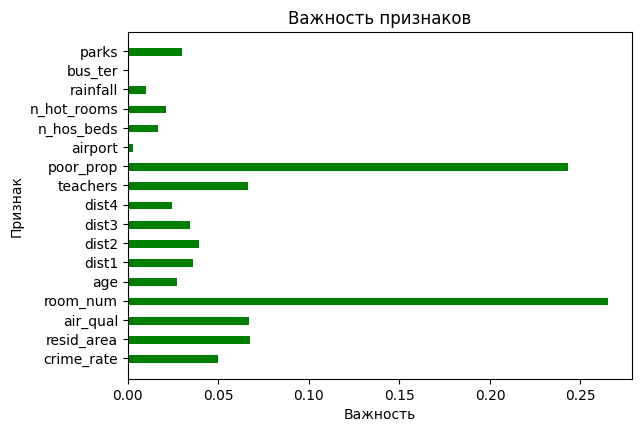

<Figure size 500x500 with 0 Axes>

In [ ]:
col = X.columns
y = model_rf.feature_importances_
fig, ax = plt.subplots()
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

**Важность признаков в моделях, сравнение:**
1. **poor_prop**
2. **room_num**

   как и у CatBoost, остальные отличаются:
3. resid_area / 3. air_qual
4. air_qual / 4. crime_rate
5. teachers / dist3 (удаленность от какого-то важного объекта)

По мне, CatBoost не только чуть точнее определил цену дома, но и рейтинг важности признаков у него как будто логичнее, чем у леса.